<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

<u>Dataset used:</u><br> 
1. daily weather data from [weather.gov.sg](http://www.weather.gov.sg/) from other active weather stations besides Changi
2. [`rainfall-monthly-number-of-rain-days.csv`](../data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more. (*updated to Nov22 Data)
3. [`rainfall-monthly-total.csv`](../data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022 (*updated to Nov22 Data)


## Problem Statement

To recommend a suitable location and date for kite flying based on historical weather data

Rainfall affects daily activities of Singapore population, hence it is worth analysing rainfall data to identify trends 

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

Station Code  | Station Name         | Missing files                                   |
------------- | ---------------------| ------------------------------------------------|
S50           | Clementi             | -                                               |
S60           | Sentosa Island       | 2016-12                                         |    
S106          | Pulau Ubin           | 2013-11 2013-12 2014-01 2014-02                 |
S108          | Marina Barrage       | -                                               |
S111          | Newton               | 2016-09 2016-10 2016-11                         |                        
S115          | Tuas South           | -                                               |

There are 16 active [weather stations](../data/Station_Records.pdf) collecting both rain and wind data in Singapore. The other weather stations are either not active or do not collect full data. Out of the 16, 4 locations - Clementi (S50), Newton (S111), Sentosa Island (S60), and Tuas South (S115) have no restrictions for kite flying (permitable fly zones are outside the red boundaries in map below) are are accessible to the public. A further 2 - Marina Barage (S108) and Pulau Ubin (S106), have restrictions of flying not higher than 200 feet above mean sea level (as indicated by shaded blue boundaries in map below). This analysis will analysis historical weather data at these 6 locations and recommend the most suitable locations for kite flying.

<img src="../picture/area-limits-map-version-24bfa8924455e4ad8b6e06eae70f46f52.jpeg" style="float: center; margin: 20px; height: 200px, width: 200px"><br>
[source: CAAS](https://www.caas.gov.sg/public-passengers/aerial-activities/flying-kites)<br>


### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [338]:
# Code:
def manual_mean(num_list):
    sum_of_list=0
    for i in range(len(num_list)):
        sum_of_list += num_list[i]
    return sum_of_list/len(num_list)

In [339]:
a= [1,2,3,4,5]
manual_mean(a)

3.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [340]:
# Code:
def manual_sd(num_list):
    sum_sq_diff=0
    for i in range(len(num_list)):
            sum_sq_diff += (num_list[i]-manual_mean(num_list))**2
    return ((1/len(num_list))*sum_sq_diff)**0.5

In [341]:
manual_sd(a)

1.4142135623730951

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [342]:
# Imports:
import os
import glob
import chardet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

 <h3><u><b>Dataset 1</b></u></h3>

<code>
#import modules
import webbrowser

#download files
stations=['50','60','106','108','111','115']
for station in stations:
    for year in range(2012,2022+1):
        for month in range(1,12+1):
            ym_str=str(year)+str(month).rjust(2, "0")
            url="http://www.weather.gov.sg/files/dailydata/DAILYDATA_S"+station+"_"+ym_str+".csv"
            try:
                webbrowser.open(url)
            except:
                pass
            
#ran the above codes to automate the downloading of files from website and have moved the files manually from download folder to project data folder
</code>

In [343]:
# Append all 778 monthly files together
df_append = pd.DataFrame()
path = "../data/DAILYDATA_*.csv" 
for file in glob.glob(path):
    with open(file,'rb') as f:
        enc = chardet.detect(f.read())
    df_temp = pd.read_csv(file,encoding = enc['encoding']) # otherwise will have uft-8 error as is in ISO-8859-1 format
    df_temp = df_temp.rename(columns=str.lower) # columns names in different case between files
    df_append = pd.concat(objs =[df_append,df_temp],axis=0)

In [344]:
weather_df = df_append.sort_values(by=['station','year','month','day'],axis=0).reset_index(drop=True)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23680 entries, 0 to 23679
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   station                        23680 non-null  object
 1   year                           23680 non-null  int64 
 2   month                          23680 non-null  int64 
 3   day                            23680 non-null  int64 
 4   daily rainfall total (mm)      23680 non-null  object
 5   highest 30 min rainfall (mm)   23680 non-null  object
 6   highest 60 min rainfall (mm)   23680 non-null  object
 7   highest 120 min rainfall (mm)  23680 non-null  object
 8   mean temperature (°c)          23680 non-null  object
 9   maximum temperature (°c)       23680 non-null  object
 10  minimum temperature (°c)       23680 non-null  object
 11  mean wind speed (km/h)         23680 non-null  object
 12  max wind speed (km/h)          23680 non-null  object
dtypes

In [345]:
new_columns_dict = {
    'station': 'station',
    'year':'year',
    'month': 'month',
    'day': 'day',
    'daily rainfall total (mm)': 'total_daily_rainfall',
    'highest 30 min rainfall (mm)': 'highest_30min_rainfall',
    'highest 60 min rainfall (mm)': 'highest_60min_rainfall',
    'highest 120 min rainfall (mm)': 'highest_120min_rainfall',
    'mean temperature (°c)': 'mean_temp',
    'maximum temperature (°c)': 'max_temp',
    'minimum temperature (°c)': 'min_temp',
    'mean wind speed (km/h)': 'mean_wind_sp',
    'max wind speed (km/h)': 'max_wind_sp'
}

weather_df.rename(columns=new_columns_dict, inplace=True)

In [346]:
weather_df.insert(4, 'date', pd.to_datetime(dict(year=weather_df['year'], month=weather_df['month'], day=weather_df['day'])))
weather_df.insert(5, 'date_ym', pd.to_datetime(dict(year=weather_df['year'], month=weather_df['month'], day=1)))

weather_df.head()

station  year  month  day       date    date_ym total_daily_rainfall  \
0  Clementi  2012      1    1 2012-01-01 2012-01-01                  0.0   
1  Clementi  2012      1    2 2012-01-02 2012-01-01                  0.0   
2  Clementi  2012      1    3 2012-01-03 2012-01-01                  0.0   
3  Clementi  2012      1    4 2012-01-04 2012-01-01                  0.0   
4  Clementi  2012      1    5 2012-01-05 2012-01-01                  0.0   

  highest_30min_rainfall highest_60min_rainfall highest_120min_rainfall  \
0                      —                      —                       —   
1                      —                      —                       —   
2                      —                      —                       —   
3                      —                      —                       —   
4                      —                      —                       —   

  mean_temp max_temp min_temp mean_wind_sp max_wind_sp  
0      27.3     31.5     25.0          5.1        23.0  
1      27.3     31.6     24.9          7.3        29.5  
2      27.2     30.5     25.4          7.8        33.1  
3      27.0     31.5     24.5          7.2        32.8  
4      26.9     31.5     24.0          6.8        34.9

In [347]:
weather_df.isnull().sum()

station                    0
year                       0
month                      0
day                        0
date                       0
date_ym                    0
total_daily_rainfall       0
highest_30min_rainfall     0
highest_60min_rainfall     0
highest_120min_rainfall    0
mean_temp                  0
max_temp                   0
min_temp                   0
mean_wind_sp               0
max_wind_sp                0
dtype: int64

In [348]:
#weather_df['total_daily_rainfall'].unique() 
#have ran the same for each col, the same cleaning required

In [349]:
col_list=['total_daily_rainfall','highest_30min_rainfall','highest_60min_rainfall','highest_120min_rainfall',
          'mean_temp','max_temp','min_temp',
          'mean_wind_sp','max_wind_sp']
for col in col_list:
    weather_df[col] = weather_df[col].map(lambda x: str(x).strip()).replace(['—','-'], np.nan).map(lambda x: float(x)) #different '-'s

In [352]:
weather_df.describe(datetime_is_numeric=True)

year         month           day  \
count  23680.000000  23680.000000  23680.000000   
mean    2016.982897      6.458826     15.729265   
min     2012.000000      1.000000      1.000000   
25%     2014.000000      4.000000      8.000000   
50%     2017.000000      6.000000     16.000000   
75%     2020.000000      9.000000     23.000000   
max     2022.000000     12.000000     31.000000   
std        3.149123      3.413615      8.799927   

                                date                        date_ym  \
count                          23680                          23680   
mean   2017-06-23 13:47:56.351351296  2017-06-08 20:17:47.837837824   
min              2012-01-01 00:00:00            2012-01-01 00:00:00   
25%              2014-10-03 00:00:00            2014-10-01 00:00:00   
50%              2017-07-06 00:00:00            2017-07-01 00:00:00   
75%              2020-03-19 00:00:00            2020-03-01 00:00:00   
max              2022-11-30 00:00:00            2022-11-01 00:00:00   
std                              NaN                            NaN   

       total_daily_rainfall  highest_30min_rainfall  highest_60min_rainfall  \
count          22914.000000            18570.000000            18557.000000   
mean               6.273584                3.679882                4.565091   
min                0.000000                0.000000                0.000000   
25%                0.000000                0.000000                0.000000   
50%                0.200000                0.000000                0.000000   
75%                5.800000                3.600000                4.200000   
max              208.200000               67.000000               92.000000   
std               13.523889                7.395472                9.547032   

       highest_120min_rainfall     mean_temp      max_temp      min_temp  \
count             18560.000000  22342.000000  22482.000000  22482.000000   
mean                  5.183109     27.932652     31.730428     25.371604   
min                   0.000000     22.200000     22.800000     20.400000   
25%                   0.000000     27.200000     30.800000     24.300000   
50%                   0.200000     28.000000     31.900000     25.300000   
75%                   4.800000     28.800000     32.900000     26.400000   
max                 122.800000     31.300000     38.000000     29.200000   
std                  11.034496      1.153172      1.641305      1.424884   

       mean_wind_sp   max_wind_sp  
count  22304.000000  22324.000000  
mean       6.646862     30.086956  
min        1.800000      6.800000  
25%        4.700000     24.100000  
50%        6.100000     28.800000  
75%        7.900000     34.600000  
max       31.300000    138.600000  
std        2.837494      8.951000

In [353]:
weather_df['rainy_day'] = weather_df['total_daily_rainfall'].apply(lambda x: 1 if x>=0.2 else 0)

In [354]:
weather_df.to_csv('../data/weather.csv',index=False)

In [355]:
mthly_rainfall_others=weather_df.groupby(['station','date_ym']).agg(total_rainfall=('total_daily_rainfall','sum'),
                                                                    no_of_rainy_days=('rainy_day','sum')).reset_index()
# to mimick the other 2 datasets provided

In [356]:
mthly_rainfall_others

station    date_ym  total_rainfall  no_of_rainy_days
0      Clementi 2012-01-01           173.2                14
1      Clementi 2012-02-01           124.8                11
2      Clementi 2012-03-01           257.8                21
3      Clementi 2012-04-01           352.2                26
4      Clementi 2012-05-01           298.6                23
..          ...        ...             ...               ...
773  Tuas South 2022-07-01           123.6                12
774  Tuas South 2022-08-01           150.1                17
775  Tuas South 2022-09-01           421.8                15
776  Tuas South 2022-10-01           410.0                24
777  Tuas South 2022-11-01           329.6                24

[778 rows x 4 columns]

 <h3><u><b>Dataset 2</b></u></h3>

In [369]:
mthly_rainfall_df= pd.read_csv("../data/rainfall-monthly-total.csv")

In [370]:
mthly_rainfall_df.head(5)

month  total_rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2

In [371]:
mthly_rainfall_df.info()
# need month in datetime format not string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           491 non-null    object 
 1   total_rainfall  491 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [372]:
mthly_rainfall_df["date_ym"] = pd.to_datetime(mthly_rainfall_df['month'], format='%Y-%m')
mthly_rainfall_df['station']='Changi'
mthly_rainfall_df.drop(columns=['month'],inplace=True)
mthly_rainfall_df.drop(mthly_rainfall_df[mthly_rainfall_df['date_ym'].dt.year<2012].index,inplace=True) 
# to get the same date range as the other weather stations

In [373]:
mthly_rainfall_df

total_rainfall    date_ym station
360           106.1 2012-01-01  Changi
361            83.6 2012-02-01  Changi
362           313.4 2012-03-01  Changi
363           260.6 2012-04-01  Changi
364           292.0 2012-05-01  Changi
..              ...        ...     ...
486           145.2 2022-07-01  Changi
487           141.4 2022-08-01  Changi
488           121.0 2022-09-01  Changi
489           280.0 2022-10-01  Changi
490           313.8 2022-11-01  Changi

[131 rows x 3 columns]

 <h3><u><b>Dataset 3</b></u></h3>

In [378]:
mthly_raindays_df= pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')

In [379]:
mthly_raindays_df.head()

month  no_of_rainy_days
0  1982-01                10
1  1982-02                 5
2  1982-03                11
3  1982-04                14
4  1982-05                10

In [380]:
mthly_raindays_df["date_ym"] = pd.to_datetime(mthly_raindays_df['month'], format='%Y-%m')
mthly_raindays_df['station']='Changi'
mthly_raindays_df.drop(columns=['month'],inplace=True)
mthly_raindays_df.drop(mthly_raindays_df[mthly_raindays_df['date_ym'].dt.year<2012].index,inplace=True)
# to get the same date range as the other weather stations

In [381]:
mthly_raindays_df

no_of_rainy_days    date_ym station
360                16 2012-01-01  Changi
361                11 2012-02-01  Changi
362                21 2012-03-01  Changi
363                20 2012-04-01  Changi
364                19 2012-05-01  Changi
..                ...        ...     ...
486                16 2022-07-01  Changi
487                15 2022-08-01  Changi
488                14 2022-09-01  Changi
489                27 2022-10-01  Changi
490                26 2022-11-01  Changi

[131 rows x 3 columns]

In [382]:
mthly_rain_df=pd.merge(left = mthly_raindays_df,
                       right = mthly_rainfall_df,
                       how = "inner",
                       on = ['date_ym','station'])

In [383]:
mthly_rain_df

no_of_rainy_days    date_ym station  total_rainfall
0                  16 2012-01-01  Changi           106.1
1                  11 2012-02-01  Changi            83.6
2                  21 2012-03-01  Changi           313.4
3                  20 2012-04-01  Changi           260.6
4                  19 2012-05-01  Changi           292.0
..                ...        ...     ...             ...
126                16 2022-07-01  Changi           145.2
127                15 2022-08-01  Changi           141.4
128                14 2022-09-01  Changi           121.0
129                27 2022-10-01  Changi           280.0
130                26 2022-11-01  Changi           313.8

[131 rows x 4 columns]

In [385]:
mthly_rainfall_df=pd.concat(objs =[mthly_rainfall_others,mthly_rain_df],axis=0,ignore_index=True)

In [386]:
filtered_mthly_rainfall_df

station    date_ym  total_rainfall  no_of_rainy_days
0    Clementi 2012-01-01           173.2                14
1    Clementi 2012-02-01           124.8                11
2    Clementi 2012-03-01           257.8                21
3    Clementi 2012-04-01           352.2                26
4    Clementi 2012-05-01           298.6                23
..        ...        ...             ...               ...
904    Changi 2022-07-01           145.2                16
905    Changi 2022-08-01           141.4                15
906    Changi 2022-09-01           121.0                14
907    Changi 2022-10-01           280.0                27
908    Changi 2022-11-01           313.8                26

[909 rows x 4 columns]

In [387]:
mthly_rainfall_df.to_csv('../data/mthly_rainfall.csv',index=False)

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

<u>merged monthly dataset:</u>
|Feature|Type|Dataset|Description|
|---|---|---|---|
|station|object|mthly_rainfall_df|Name of weather station|
|date_ym|datetime64|mthly_rainfall_df|Date (monthly-format) of weather observation|
|total_rainfall|float64|mthly_rainfall_df|Total monthly rainfall in mm at weather station|
|no_of_rainy_days|int64|mthly_rainfall_df|Days within month with at least 0.2mm rain at weather station|

<u>appended daily dataset:</u>
|Feature|Type|Dataset|Description|
|---|---|---|---|
|station|object|weather_df|Name of weather station|
|year|int64|weather_df|Year of date of weather observation|
|month|int64|weather_df|Month of date of weather observation|
|day|int64|weather_df|Day of date of weather observation|
|date|datetime64|weather_df|Date of weather observation|
|date_ym|datetime64|weather_df|Date (monthly-format) of weather observation|
|total_daily_rainfall|float64|weather_df|Total daily rainfall in mm at weather station| 
|rainy_day|int64|weather_df|1/0 tagging of days with at least 0.2mm of rain at weather station|
|highest_30min_rainfall|float64|weather_df|highest 30min rainfall in mm at weather station| 
|highest_60min_rainfall|float64|weather_df|highest 60min rainfall in mm at weather station| 
|highest_120min_rainfall|float64|weather_df|highest 120min rainfall in mm at weather station| 
|mean_temp|float64|weather_df|average daily temperature in °c at weather station| 
|max_temp|float64|weather_df|maximum daily temperature in °c at weather station| 
|min_temp|float64|weather_df|minimum daily temperature in °c at weather station| 
|mean_wind_sp|float64|weather_df|average wind speed in km/hr at weather station| 
|max_wind_sp|float64|weather_df|maximum wind speed in km/hr at weather station| 

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [390]:
#Code:
mthly_rain_df.describe(datetime_is_numeric=True, percentiles=[0.25,0.5,.75,.975])

no_of_rainy_days                        date_ym  total_rainfall
count        131.000000                            131      131.000000
mean          14.625954  2017-06-01 03:28:51.297709824      163.967939
min            1.000000            2012-01-01 00:00:00        0.200000
25%           10.500000            2014-09-16 00:00:00       89.400000
50%           15.000000            2017-06-01 00:00:00      144.400000
75%           19.000000            2020-02-15 12:00:00      216.200000
97.5%         24.750000            2022-07-24 06:00:00      369.250000
max           27.000000            2022-11-01 00:00:00      692.800000
std            5.587535                            NaN      101.477338

In [401]:
col_names=['no_of_rainy_days', 'total_rainfall']
rain_dict=mthly_rainfall_df[col_names].to_dict()
sd= {item: manual_sd(value) for (item, value) in rain_dict.items()}
print(sd)

{'no_of_rainy_days': 5.51819524040582, 'total_rainfall': 101.68317077782648}


In [403]:
for col in col_names:
    for year in range(2012,2022+1,5):
        print(str(col)+" : "+str(year))
        print("lowest")
        print(mthly_rainfall_df[mthly_rainfall_df['date_ym'].dt.year==year].nsmallest(n=3, columns=[col])[['date_ym','station',col]])
        print("highest")
        print(mthly_rainfall_df[mthly_rainfall_df['date_ym'].dt.year==year].nlargest(n=3, columns=[col])[['date_ym','station',col]])
        print(" ")

no_of_rainy_days : 2012
lowest
       date_ym         station  no_of_rainy_days
652 2012-06-01      Tuas South                 5
136 2012-06-01  Marina Barrage                 6
522 2012-06-01  Sentosa Island                 7
highest
       date_ym   station  no_of_rainy_days
3   2012-04-01  Clementi                26
11  2012-12-01  Clementi                26
265 2012-04-01    Newton                25
 
no_of_rainy_days : 2017
lowest
       date_ym         station  no_of_rainy_days
325 2017-07-01          Newton                 0
578 2017-03-01  Sentosa Island                 0
577 2017-02-01  Sentosa Island                 3
highest
       date_ym     station  no_of_rainy_days
70  2017-11-01    Clementi                26
717 2017-11-01  Tuas South                26
329 2017-11-01      Newton                25
 
no_of_rainy_days : 2022
lowest
       date_ym         station  no_of_rainy_days
506 2022-01-01      Pulau Ubin                 4
257 2022-07-01  Marina Barrage               

In [404]:
mthly_rainfall_df['year']=mthly_rainfall_df['date_ym'].dt.year

In [405]:
mthly_rainfall_df.groupby(['year','station']).agg(yearly_rainfall=('total_rainfall','sum')).sort_values(by='yearly_rainfall', ascending=False).head(3)

yearly_rainfall
year station                    
2020 Tuas South           3418.6
2021 Clementi             3113.4
2018 Clementi             2983.1

In [406]:
mthly_rainfall_df.groupby(['year','station']).agg(yearly_rainfall=('total_rainfall','sum')).sort_values(by='yearly_rainfall', ascending=True).head(3)

yearly_rainfall
year station                        
2019 Marina Barrage            950.8
2015 Changi                   1267.1
     Pulau Ubin               1279.0

In [409]:
mthly_rainfall_df.groupby(['year','station']).agg(yearly_rainydays=('no_of_rainy_days','sum')).sort_values(by='yearly_rainydays', ascending=True).head(3)

yearly_rainydays
year station                         
2019 Marina Barrage                89
     Changi                       120
     Sentosa Island               120

In [410]:
mthly_rainfall_df.groupby(['year','station']).agg(yearly_rainydays=('no_of_rainy_days','sum')).sort_values(by='yearly_rainydays', ascending=False).head(3)

yearly_rainydays
year station                   
2013 Clementi               227
2020 Clementi               217
2013 Newton                 210

In [411]:
sns.boxplot(mthly_rainfall_df.no_of_rainy_days);

In [414]:
upper_bound=mthly_rainfall_df['no_of_rainy_days'].mean()+3*mthly_rainfall_df['no_of_rainy_days'].std()
upper_bound

31.46138894297451

In [415]:
mthly_rain_df['outlier_days']=mthly_rain_df['no_of_rainy_days'].apply(lambda x: 1 if x>upper_bound else 0)
mthly_rain_df['outlier_days'].sum()

0

In [419]:
sns.boxplot(mthly_rainfall_df.total_rainfall);

In [420]:
upper_bound=mthly_rainfall_df['total_rainfall'].mean()+3*mthly_rainfall_df['total_rainfall'].std()
upper_bound

486.99159233035084

In [421]:
mthly_rainfall_df['outlier_rainfall']=mthly_rainfall_df['total_rainfall'].apply(lambda x: 1 if x>upper_bound else 0)
mthly_rainfall_df['outlier_rainfall'].sum()

3

In [424]:
col_list=['total_daily_rainfall','highest_120min_rainfall',
          'mean_temp',
          'mean_wind_sp','max_wind_sp']
for col in col_list:
    print(col)
    print(weather_df[col].describe())
    print(weather_df.groupby('month')[col].describe())
    print(weather_df.groupby('station')[col].describe())
    print(" ")

total_daily_rainfall
count    22914.000000
mean         6.273584
std         13.523889
min          0.000000
25%          0.000000
50%          0.200000
75%          5.800000
max        208.200000
Name: total_daily_rainfall, dtype: float64
        count      mean        std  min  25%  50%    75%    max
month                                                          
1      1944.0  5.924640  15.541977  0.0  0.0  0.0   3.80  186.0
2      1783.0  4.312956  11.873490  0.0  0.0  0.0   1.60  151.8
3      2005.0  4.964788  11.689303  0.0  0.0  0.0   3.00  143.2
4      1887.0  7.577318  14.349959  0.0  0.0  0.4   8.70  113.2
5      1929.0  6.589839  13.409792  0.0  0.0  0.2   5.80   98.4
6      1880.0  5.744840  14.032320  0.0  0.0  0.1   5.00  208.2
7      1963.0  4.754508  10.889392  0.0  0.0  0.0   3.80   95.2
8      2011.0  5.211338  11.699009  0.0  0.0  0.0   4.30  132.2
9      1920.0  6.300208  14.204759  0.0  0.0  0.0   5.60  129.6
10     1978.0  6.313751  13.066960  0.0  0.0  0.2   6.15

**<u>daily rainfall total (mm)</u>** 
1. More than median
- Apr (0.6), Nov (2.2), Dec (1.2) <- median daily rainfall within month > overall median daily rainfall (0.2) with Nov being the wettest
- No locations have median daily rainfall at centre > overall median daily rainfall (0.2)
2. Less than median
- Jan, Feb, Mar, Jun, Jul, Aug, Sep (0.0) <- median daily rainfall within month < overall median daily rainfall (0.2)
- Marina Barrage, Sentosa Island (0.0) <- median daily rainfall at station < overall median daily rainfall (0.2)      

**<u>highest 120 min rainfall (mm)</u>**
1. More than median
- Apr (0.4), Nov (1.2), Dec (0.8) <- median highest 120 min rainfall within month > overall median daily highest 120 min rainfall (0.2) with Nov being the wettest
- No locations have median highest 120 min rainfall at station > overall median daily highest 120 min rainfall (0.2)    
2. Less than median
- Jan, Feb, Mar, Jun, Jul, Aug, Sep (0.0) <- median daily highest 120 min rainfall within month < overall median daily highest 120 min rainfall (0.2)
- Marina Barrage, Sentosa Island (0.0) <- median daily highest 120 min rainfall at station < overall median daily highest 120 min rainfall (0.2) 

**<u>mean temperature (°c)</u>**
1. More than median
- Apr-Oct <- median daily mean temperature within month > overall median daily mean temperature (28.0) with May being the hottest.
- Marina Barrage (28.6), Sentosa Island (28.3), Tuas South (28.2)<- median daily maximum temperature at station > overall median daily mean temperature (28.0) with Marina Barrage being the hottest   
2. Less than median
- Jan, Feb, Nov, Dec <- lower median daily mean temperature within month < overall daily mean temperture (28.0) with Jan/Dec being the coolest
- Clementi, Newton, Pulau Ubin <- lower median daily mean temperature at station < overall daily mean temperture (28.0) with Pulau Ubin being the coolest

**<u>mean wind speed (km/h)</u>**
1. More than median
- Jan-Mar, Jul, Aug  <- median daily mean wind speed within month > overall median daily mean wind speed (6.1) with Feb being the windiest.
- Newton, Tuas South <- median daily mean wind speed at station > overall median daily mean wind speed (6.1) with Newton being the windiest  
2. Less than median
- Apr-Jun, Oct-Nov <- lower median mean wind speed within month < overall daily mean wind speed (6.1) with Nov being the least windy 
- Clementi, Pulau Ubin, Sentosa Island, <- lower median daily mean wind speed at station < overall daily mean wind speed (6.1) with Pulau Ubin being the least windy 

**<u>max wind speed (km/h)</u>**
1. More than median
- Jan-Mar, Aug, Dec  <- median daily max wind speed within month > overall median daily max wind speed (28.8) with Aug having the highest max wind speed
- Newton <- median daily max wind speed at station > ooverall median daily max wind speed (28.8) 
2. Less than median
- Apr-Jun, Oct-Nov <- lower median max wind speed within month < overall daily max wind speed (28.8) with Oct having the lowest max wind speed 
- All stations except Newton <- lower median daily max wind speed at station < overall daily max wind speed (28.8) 

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


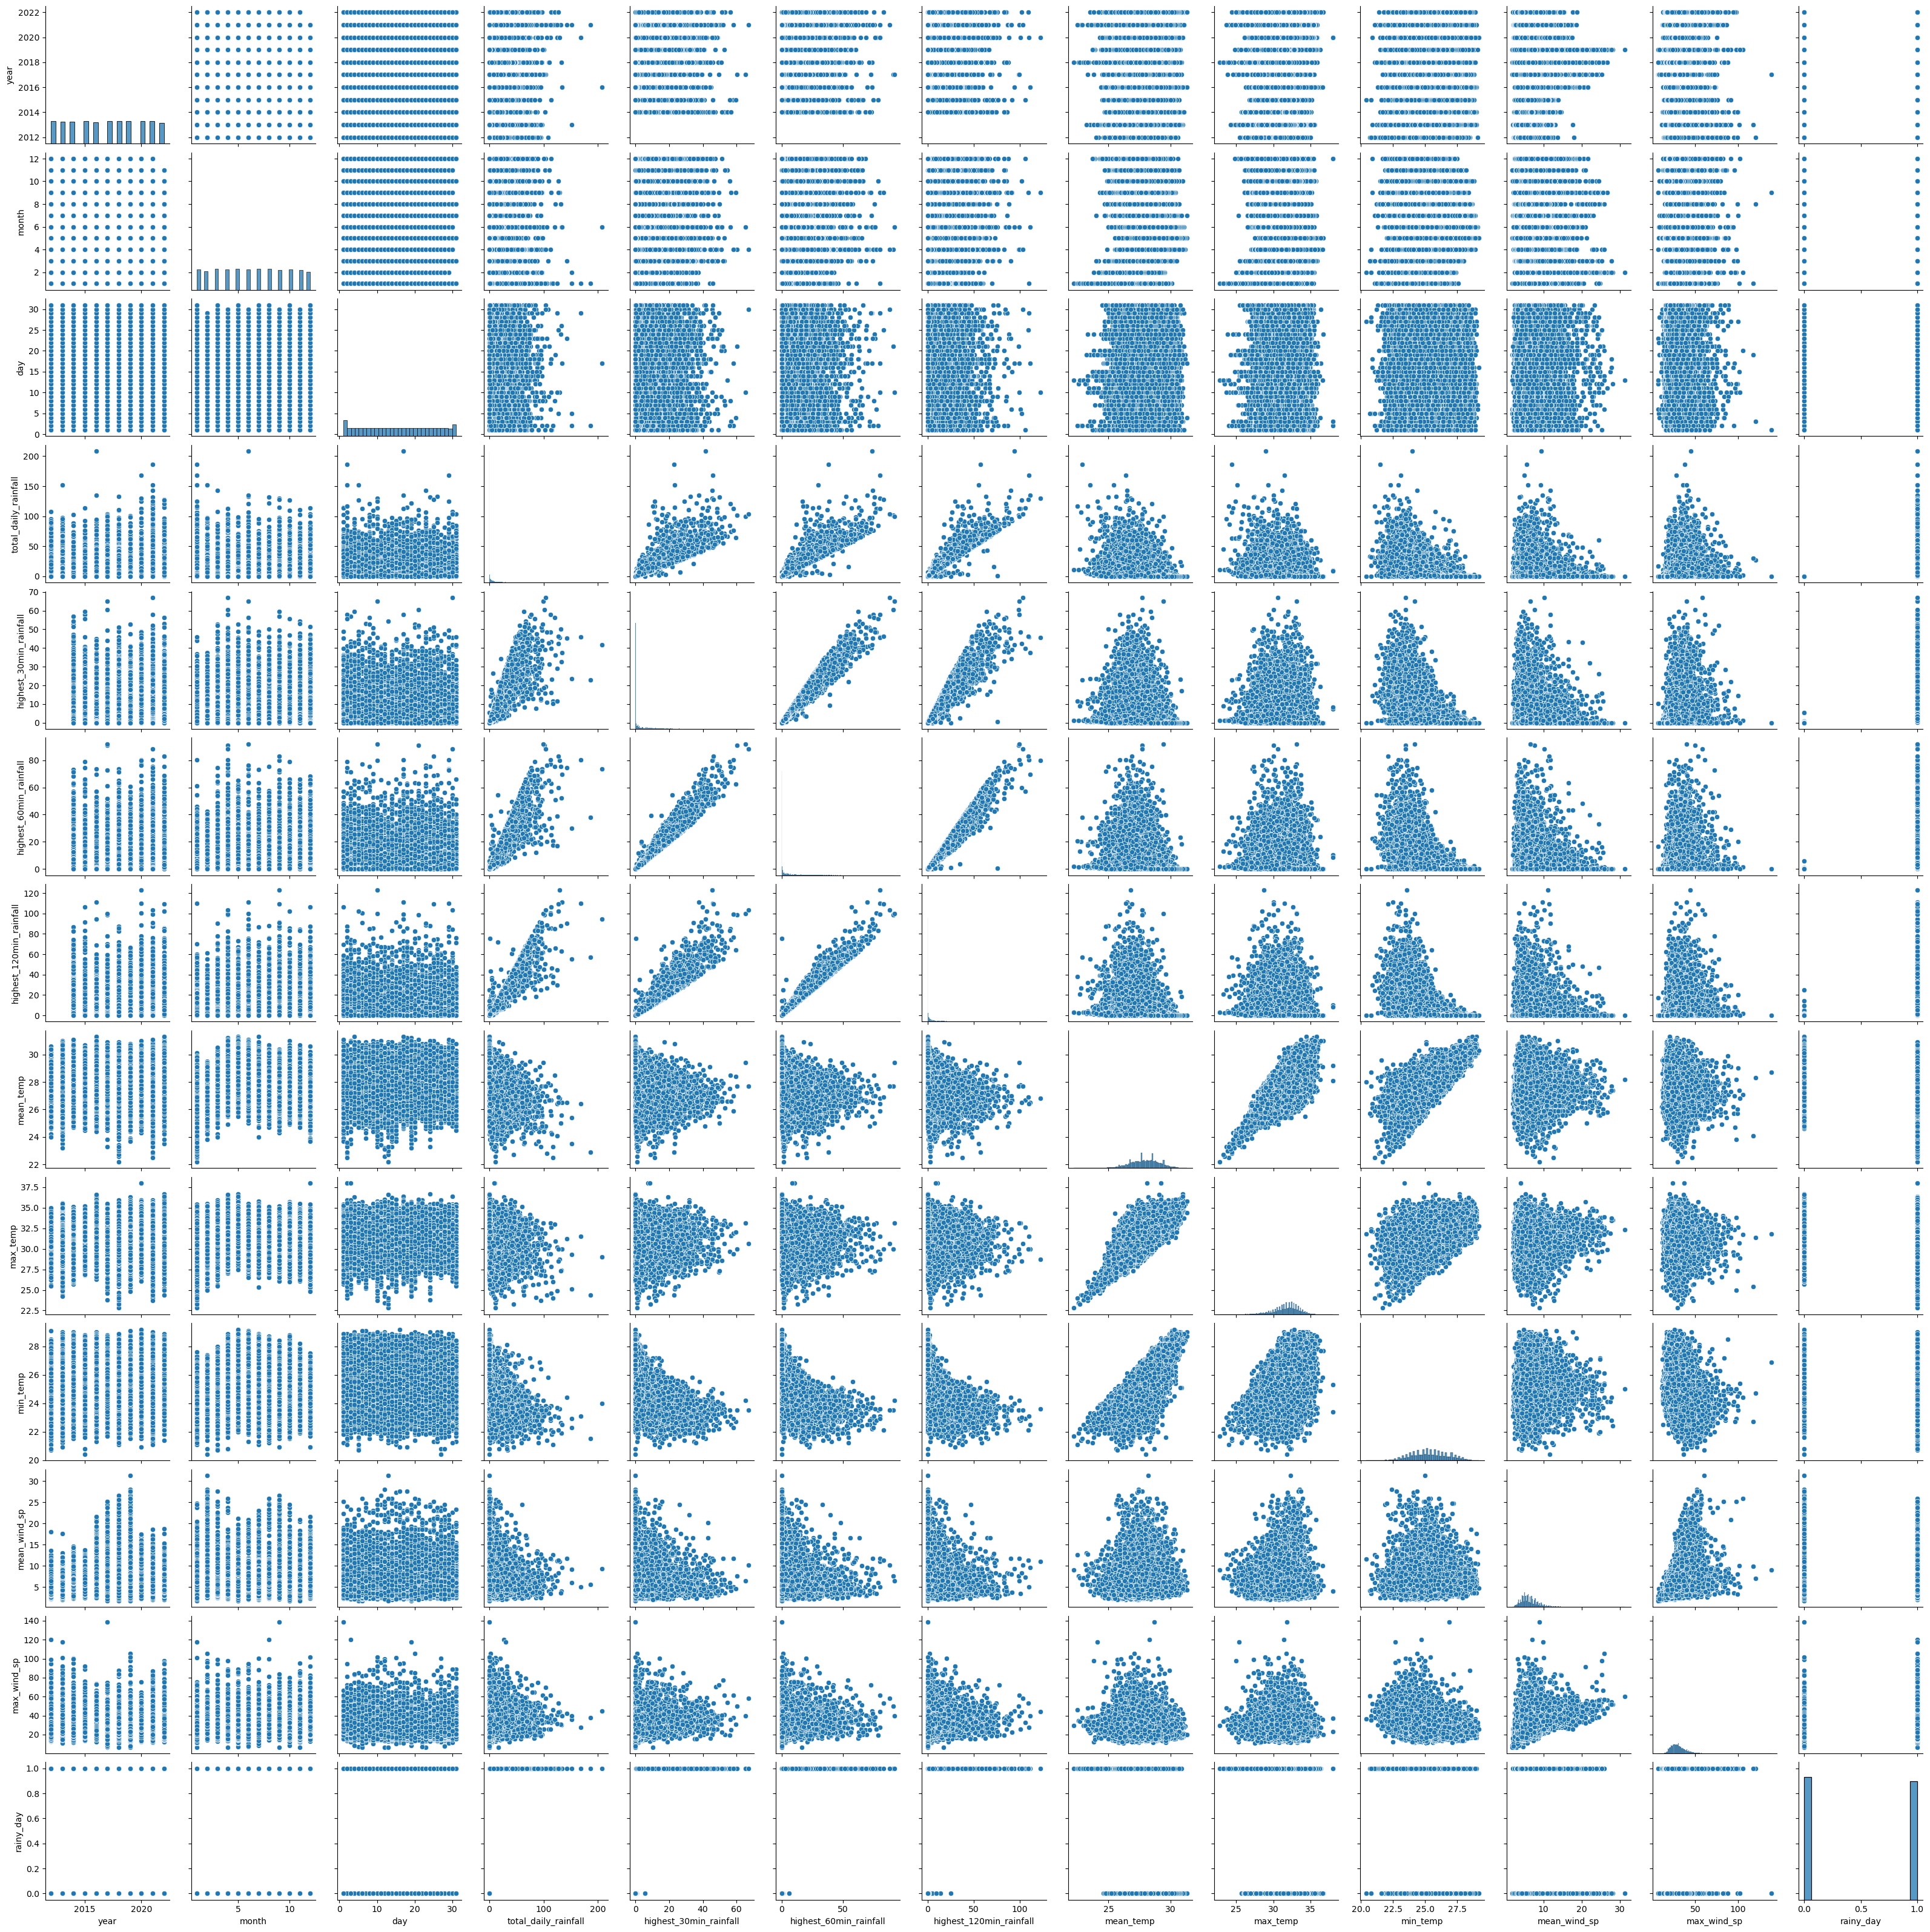

In [425]:
sns.pairplot(weather_df)

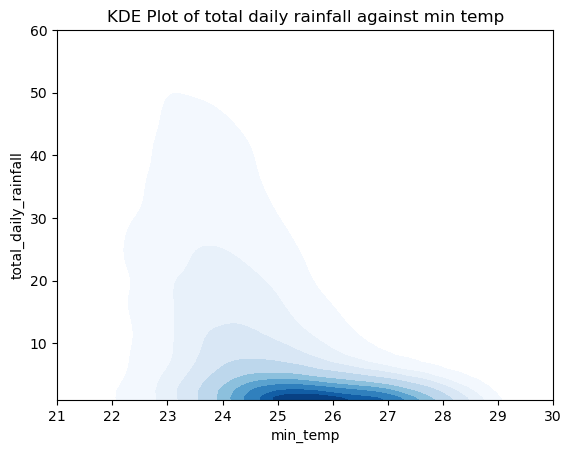

In [426]:
fig, ax = plt.subplots()
sns.kdeplot(data=weather_df, y='total_daily_rainfall', x='min_temp', cmap='Blues',fill=True, ax=ax)
plt.title('KDE Plot of total daily rainfall against min temp')
ax.set_ylim(1, 60)
ax.set_xlim(21, 30)
plt.show()

total rainfall (y) vs min temp /mean wind/ max wind (x) appears to be right skewed relationship. obs of rainfall (y) is more concentrated at lower end of (x) with median < mean.
while the observations of rain on days with high min temperature (>28 degrees) are very low, there are also <10% of such days in the dataset and not good for long term planning but good for last min ad-hoc kite-flying

<AxesSubplot: >

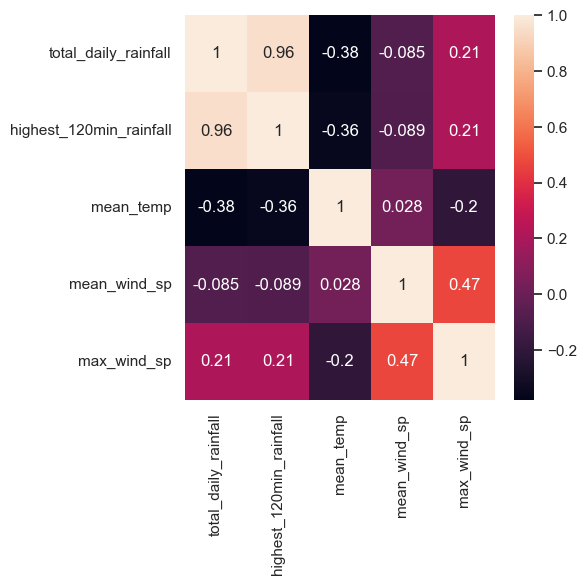

In [484]:
plt.figure(figsize=(5,5))
sns.heatmap(weather_df[col_list].corr(), annot=True)

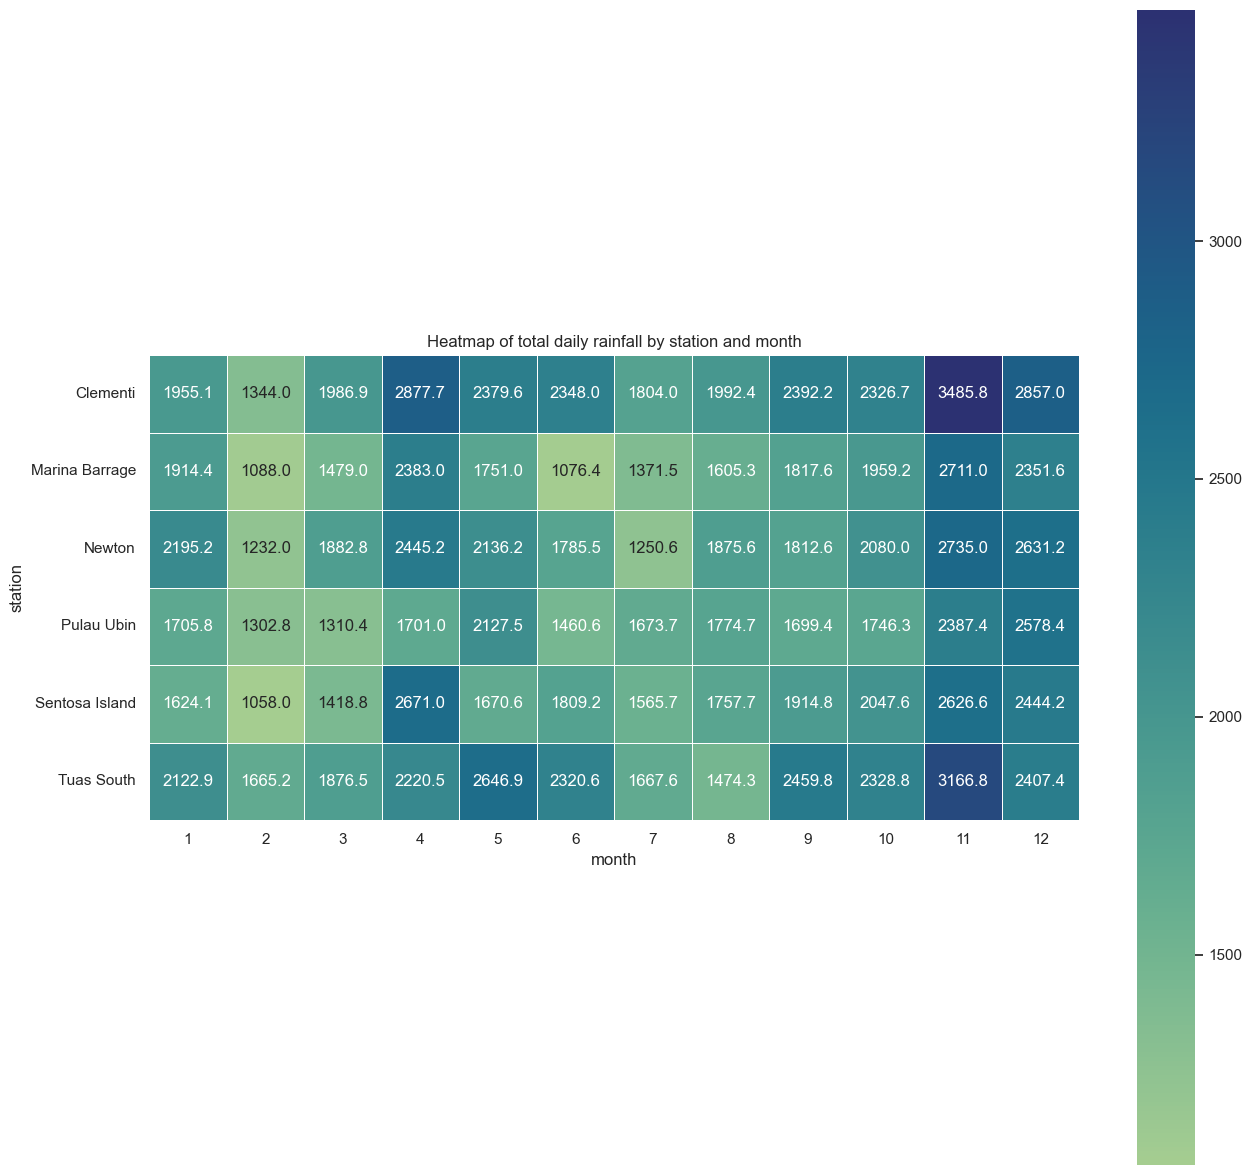

In [481]:
table_newton_rainfall = pd.pivot_table(weather_df, values='total_daily_rainfall', index=['station'],
                    columns=['month'], aggfunc=np.sum)
plt.title('Heatmap of total daily rainfall by station and month')
sns.heatmap(table_newton_rainfall, annot=True, fmt=".1f",square=True, linewidth=.5,cmap="crest")
plt.show()

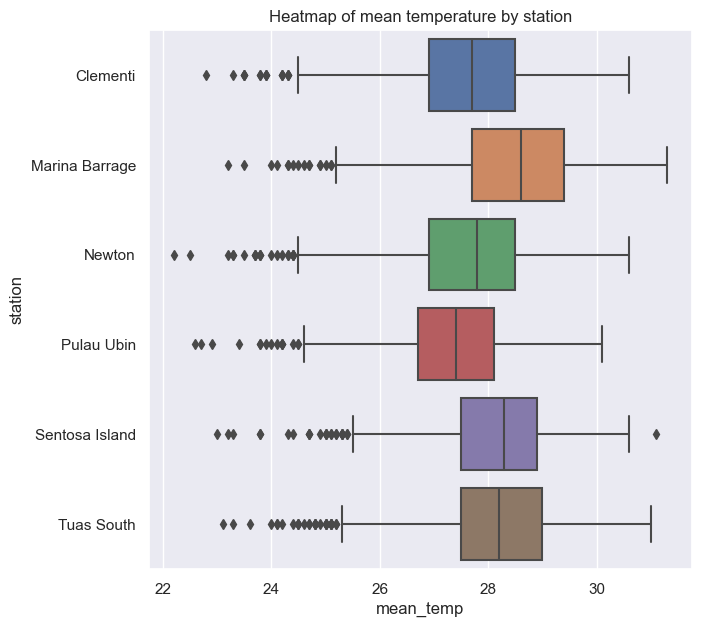

In [467]:
plt.title('Heatmap of mean temperature by station')
sns.set(rc={'figure.figsize': (7, 7)})
sns.boxplot(data=weather_df, x='mean_temp', y='station')
plt.show()

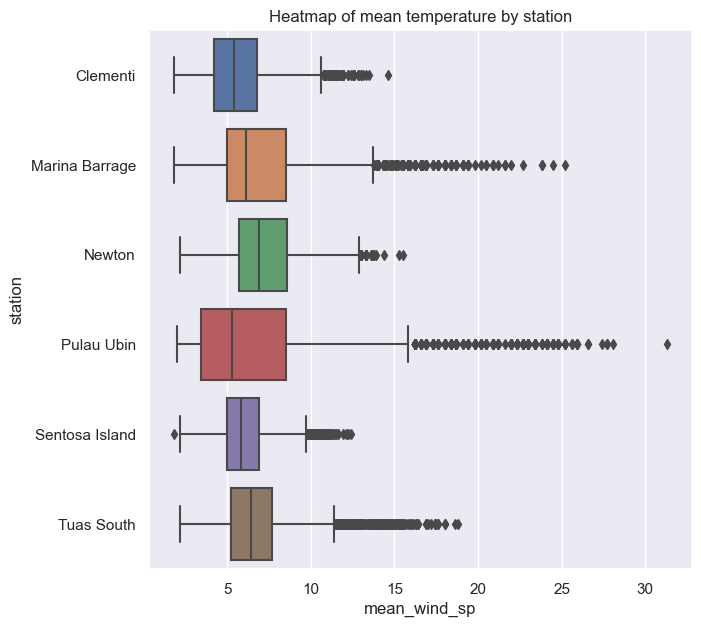

In [468]:
plt.title('Heatmap of mean temperature by station')
sns.set(rc={'figure.figsize': (7, 7)})
sns.boxplot(data=weather_df, x='mean_wind_sp', y='station')
plt.show()

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

<h4><u>Conclusion</u></h4>
Marina Barage has always been a top choice for kite enthusiasts to fly kites. Surprisingly, it is not the windiest location in Singapore and has height restrictions. Newton instead is the windiest with the nearest park being the botanic gardens with wide spaces,
Jan, Feb, Mar, Jun, Jul, Aug, and Sep have low rainfall and lower observations of long periods of rain (120mins).
Jan and Feb are also the coolest months.
<br><br>
Therefore, the best time (low rain, low temp) for kite flying would be Jan/Feb and the best location (windiest) is at Botanic Gardens (nearest park to Newton weather centre)


Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!